In [73]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import plotter
import numpy as np

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

In [42]:
cpeb4     = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_7D  = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSDAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_12D = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGIDPLNDIDPLKKNFASNHIQLQKYARPSDAFAPKDWMEDDLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_d4  = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

**Available Runs**

In [43]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)
idx = plotty.make_index(force_update=True);
print(idx[['Protein','I','Eps','Scale']])

       Protein    I Eps  Scale
0    12D_CPEB4   10  10   1.00
1    12D_CPEB4  400  10   1.00
2    12D_CPEB4   10  80   0.80
3    12D_CPEB4  400  80   0.80
4    12D_CPEB4   10  80   1.00
5    12D_CPEB4  400  80   1.00
6     7D_CPEB4   10  10   1.00
7     7D_CPEB4  400  10   1.00
8     7D_CPEB4   10  80   0.80
9     7D_CPEB4  400  80   0.80
10    7D_CPEB4   10  80   1.00
11    7D_CPEB4  400  80   1.00
12       CPEB4   13  10   0.55
13       CPEB4    1  10   0.55
14       CPEB4   13  10   0.70
15       CPEB4    1  10   0.70
16       CPEB4   13  10   0.85
17       CPEB4    1  10   0.85
18       CPEB4   13  10   1.00
19       CPEB4    1  10   1.00
20       CPEB4   10  10   1.00
21       CPEB4  400  10   1.00
22       CPEB4   10  80   0.80
23       CPEB4  400  80   0.80
24       CPEB4   10  80   1.00
25       CPEB4  400  80   1.00
26       CPEB4   95  80   1.00
27       CPEB4   25  80   0.55
28       CPEB4   25  80   0.70
29       CPEB4   25  80   0.85
30       CPEB4   25  80   1.00
31      

### Effect of charges (low ε, low I) on variants

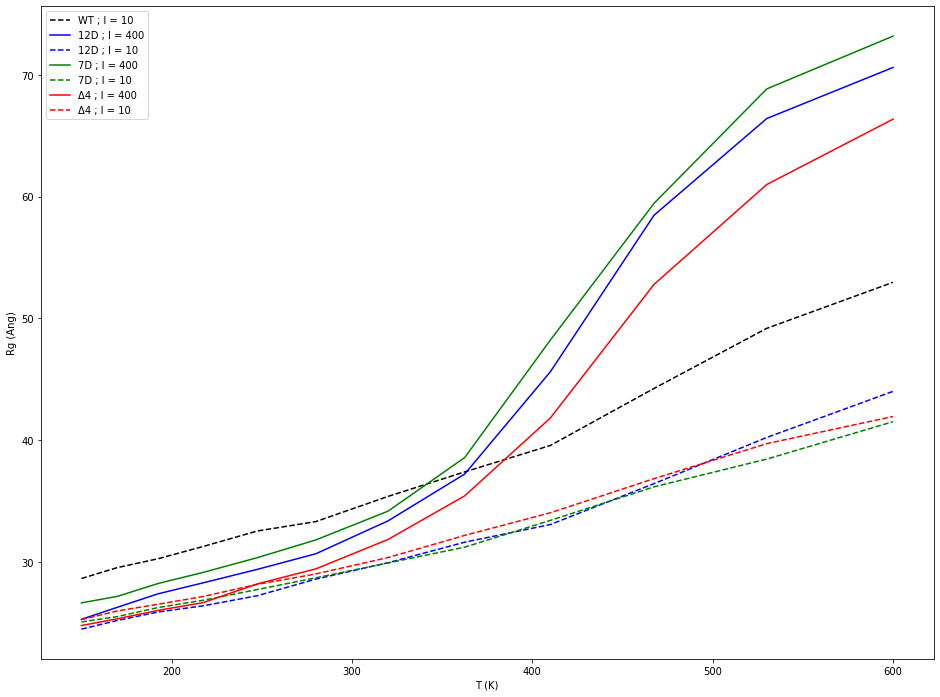

In [85]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

# plotty.plot(observable='rg', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=13, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

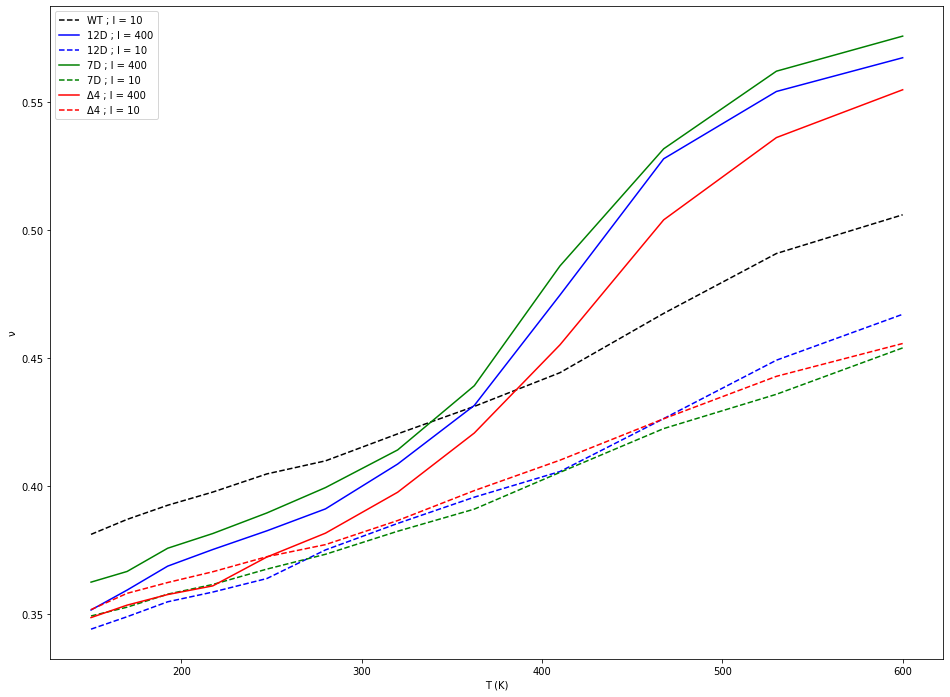

In [86]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

# plotty.plot(observable='flory', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=13, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

### Effect of I on variants

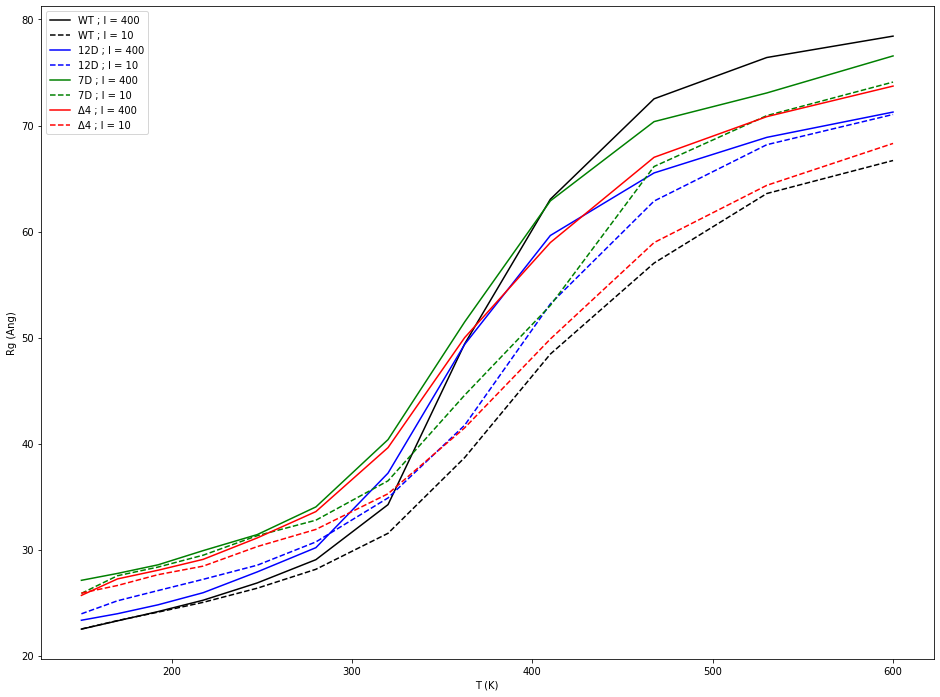

In [46]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

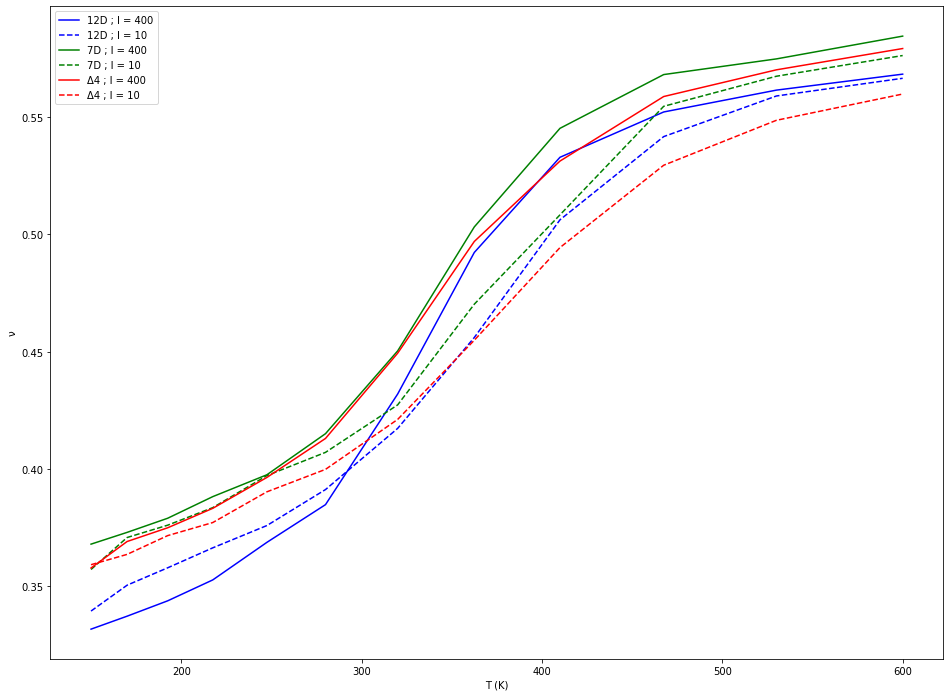

In [84]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

# plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
# plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

448
440
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
27

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

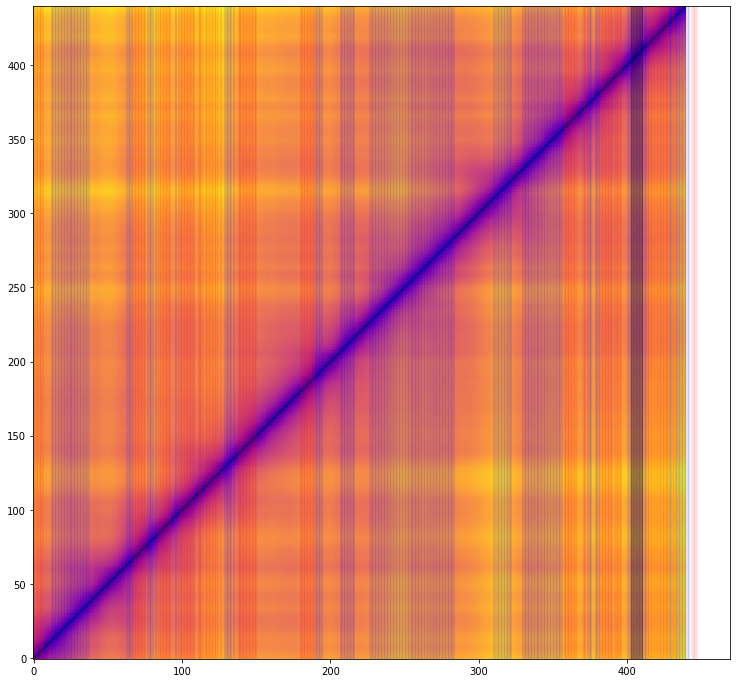

In [81]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='distance_map', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', sequence=cpeb4)
plotty.plot(observable='distance_map', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', sequence=cpeb4)

# plotty.plot(observable='distance_map', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', sequence=cpeb4_12D)
# plotty.plot(observable='distance_map', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', sequence=cpeb4_12D)

# plotty.plot(observable='distance_map', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', sequence=cpeb4_7D)
# plotty.plot(observable='distance_map', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', sequence=cpeb4_7D)

# plotty.plot(observable='distance_map', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400', sequence=cpeb4_d4)
# plotty.plot(observable='distance_map', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', sequence=cpeb4_d4)

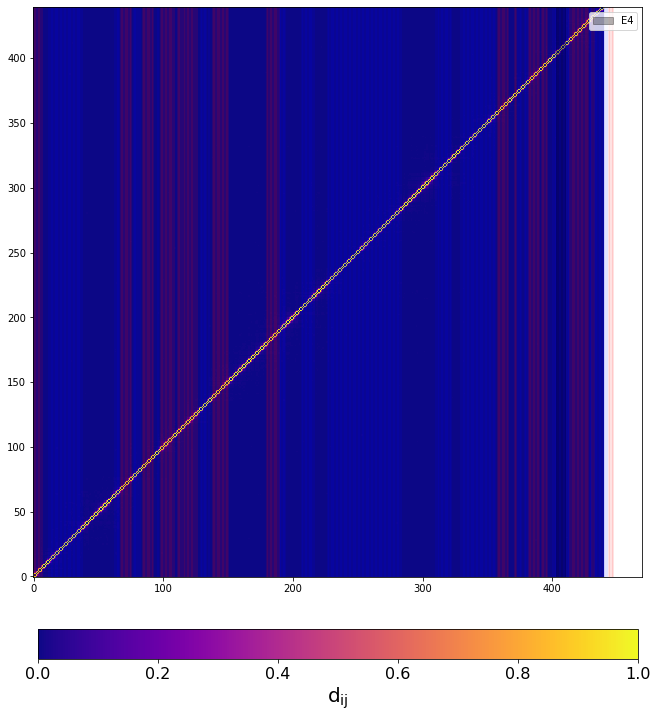

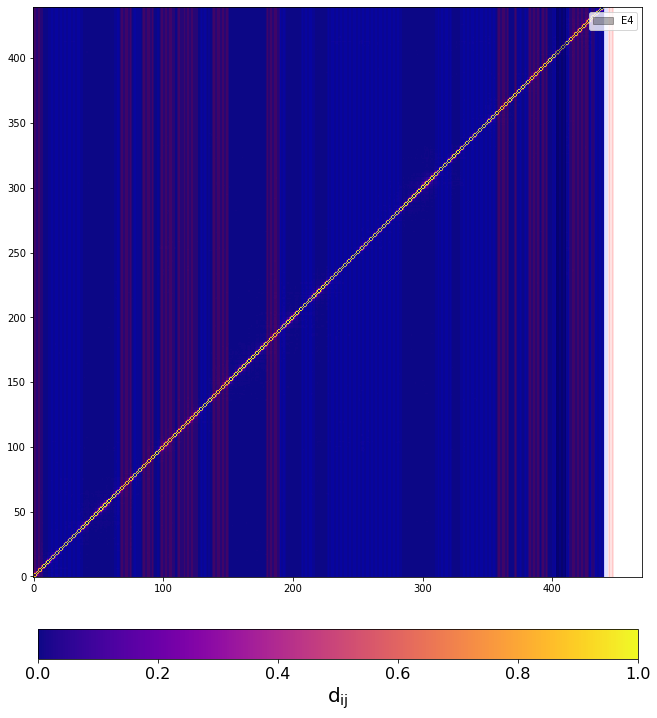

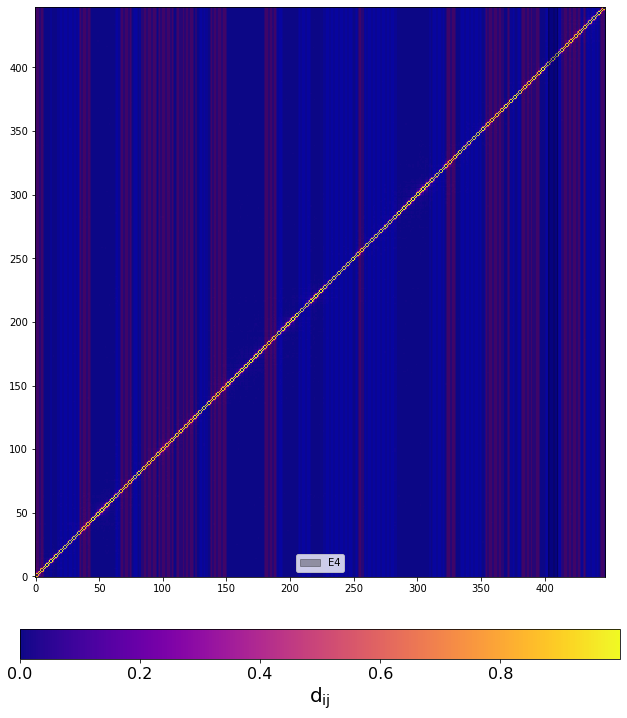

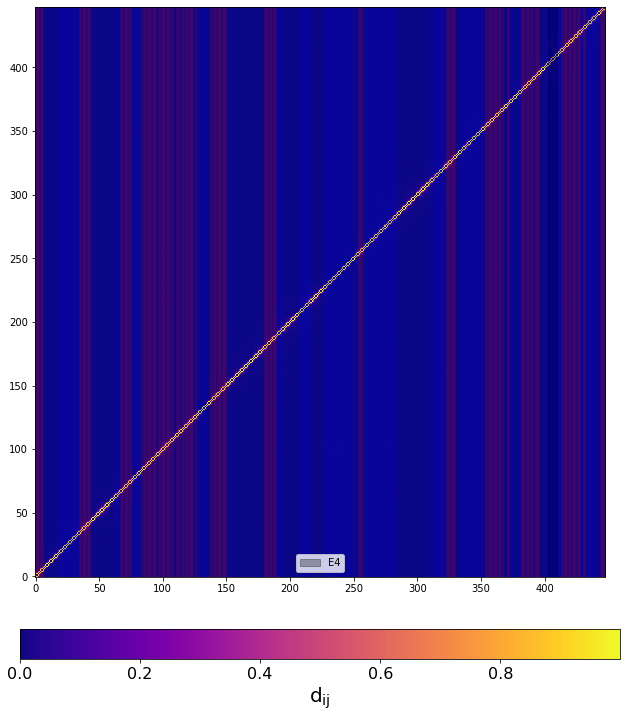

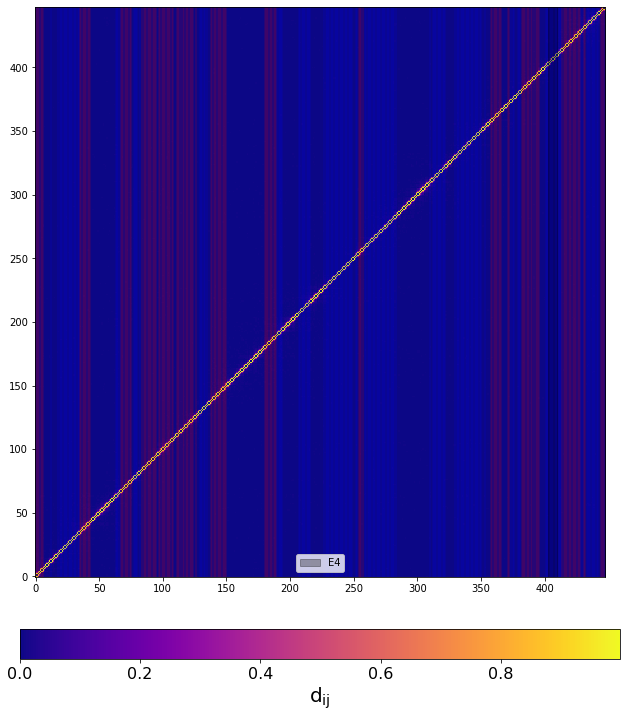

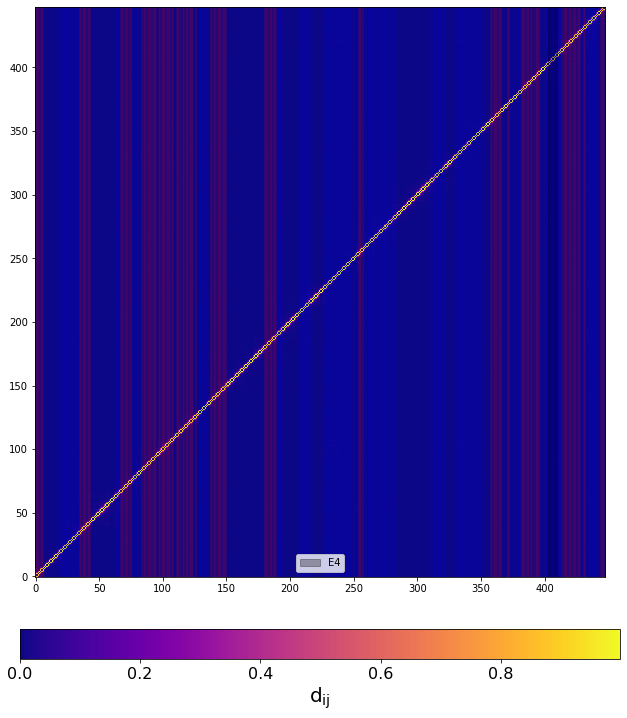

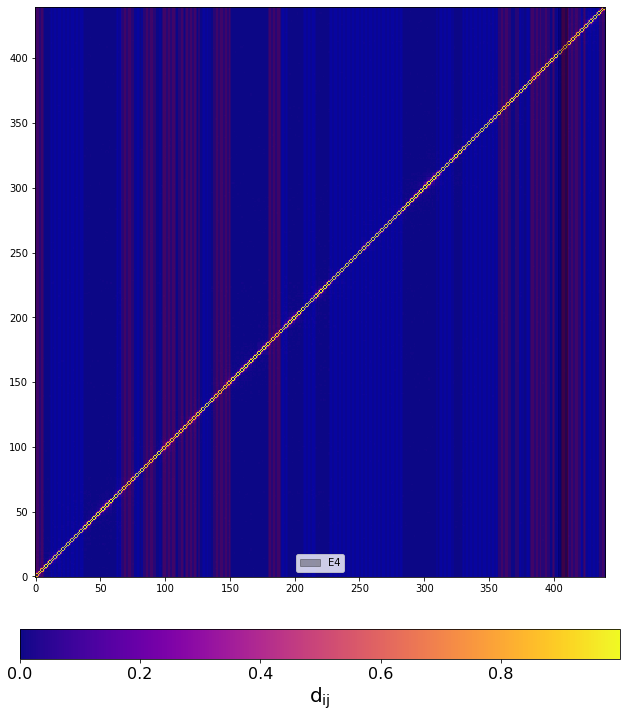

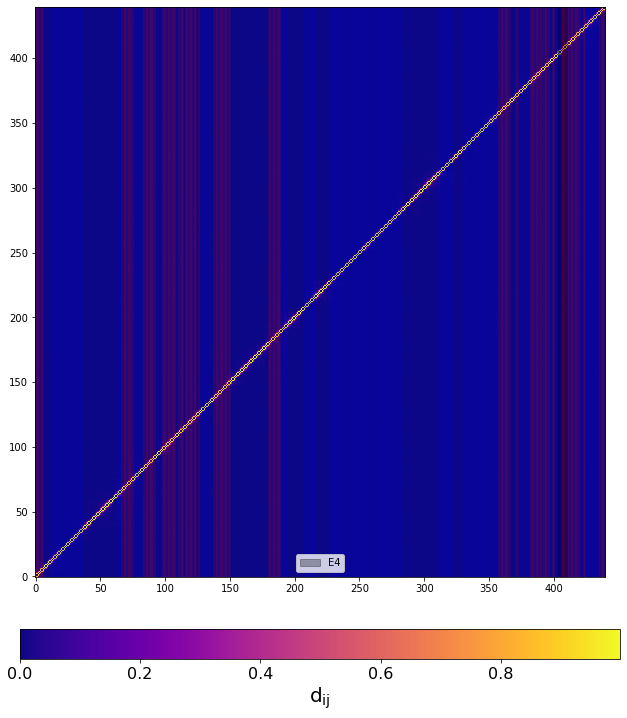

In [75]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='contact_map', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', sequence=cpeb4)
plotty.plot(observable='contact_map', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', sequence=cpeb4)

plotty.plot(observable='contact_map', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', sequence=cpeb4_12D)
plotty.plot(observable='contact_map', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', sequence=cpeb4_12D)

plotty.plot(observable='contact_map', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', sequence=cpeb4_7D)
plotty.plot(observable='contact_map', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', sequence=cpeb4_7D)

plotty.plot(observable='contact_map', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400', sequence=cpeb4_d4)
plotty.plot(observable='contact_map', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', sequence=cpeb4_d4)

### Effect of Hydrophobicity on variants

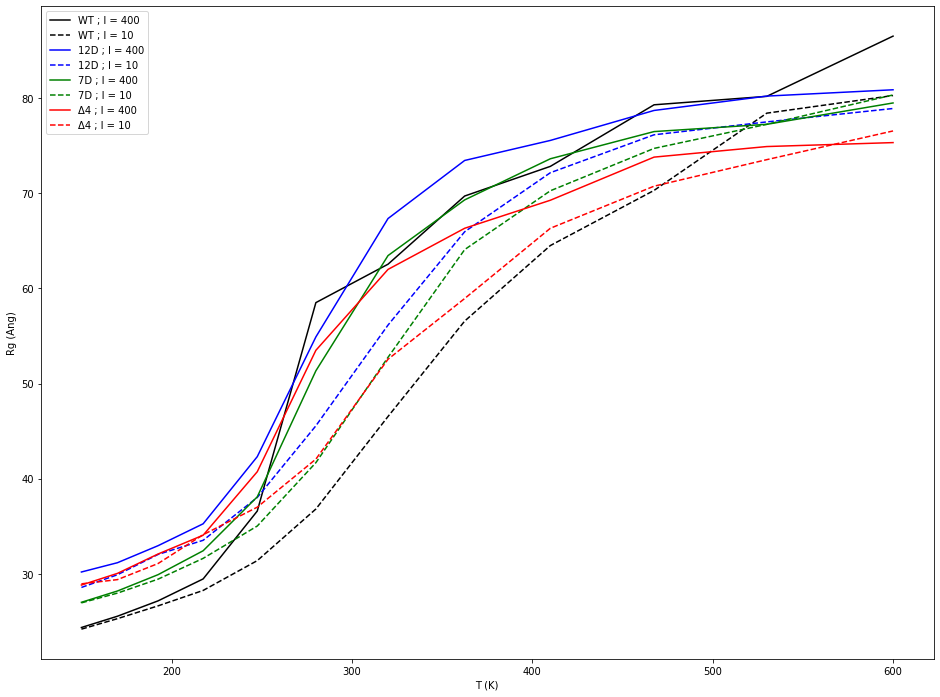

In [50]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

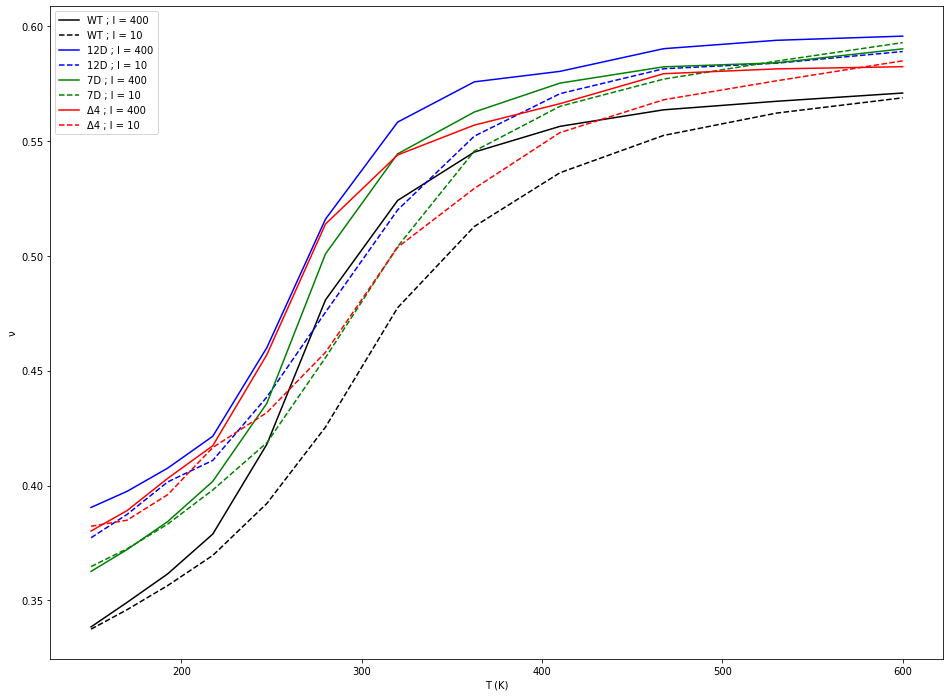

In [51]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

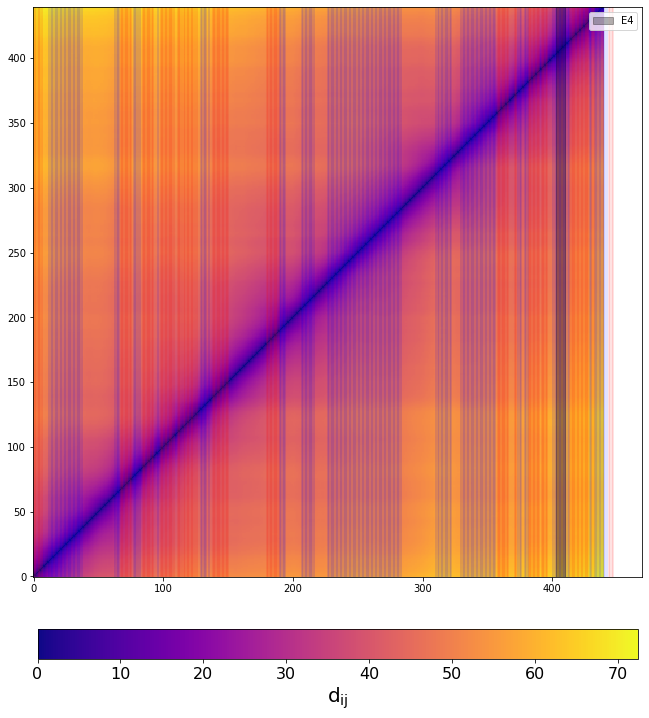

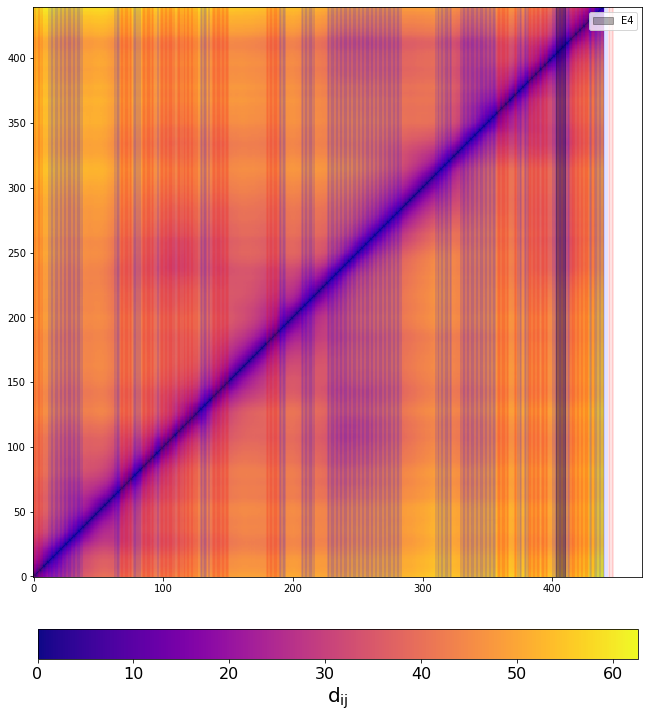

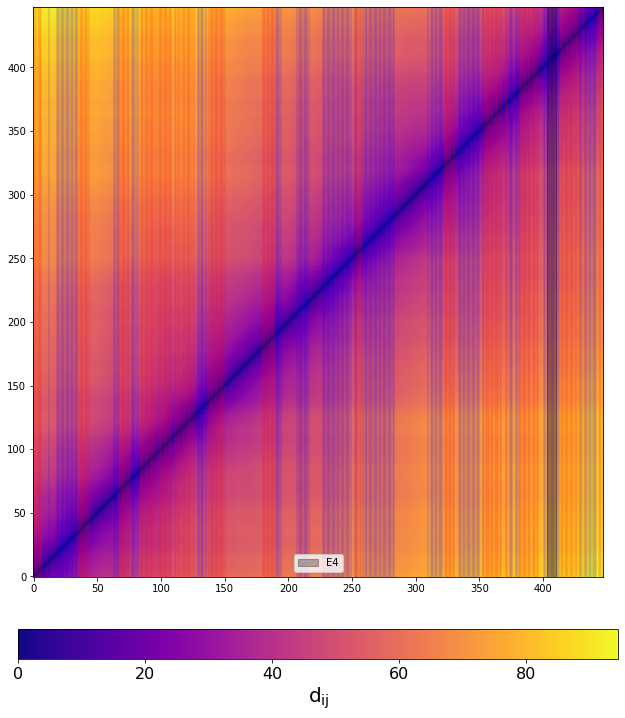

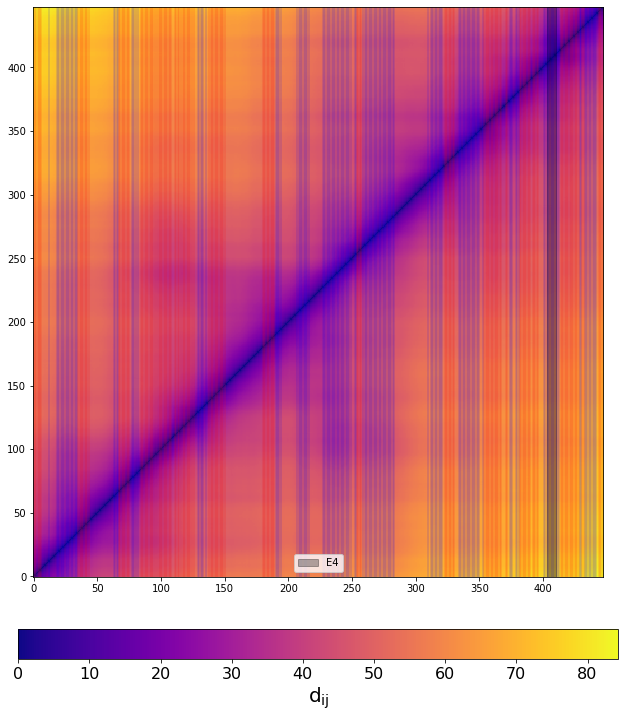

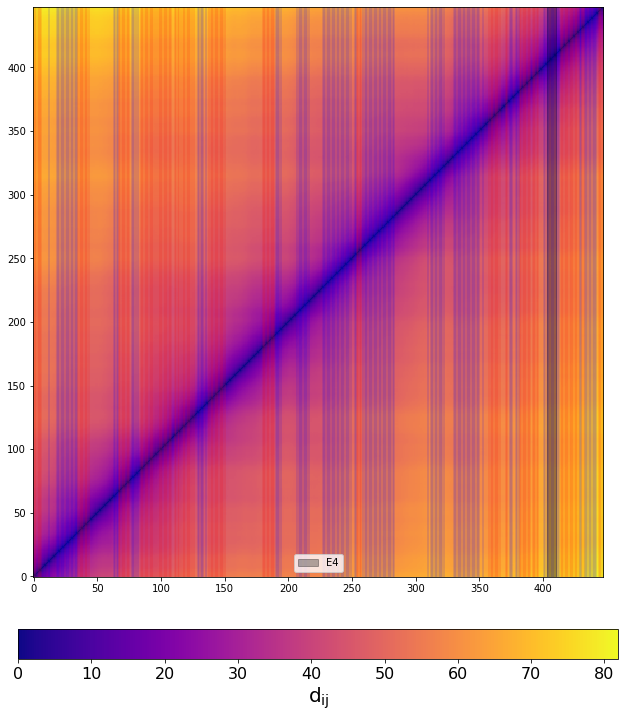

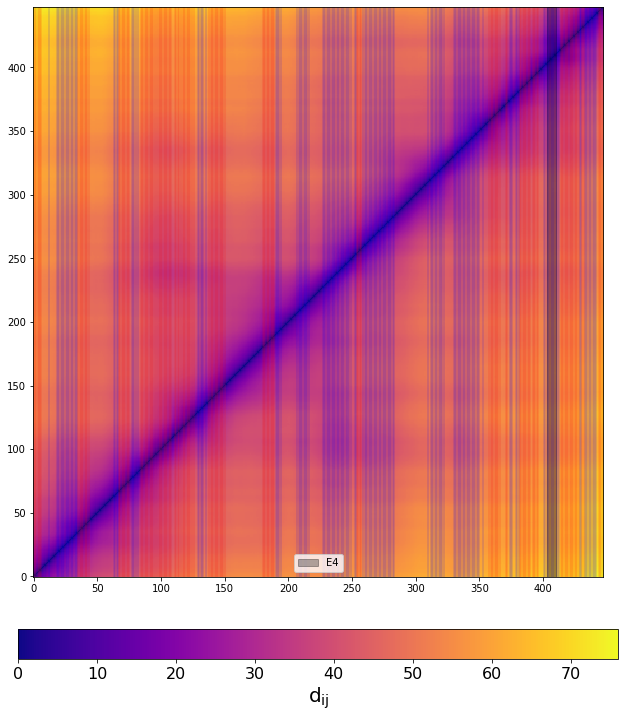

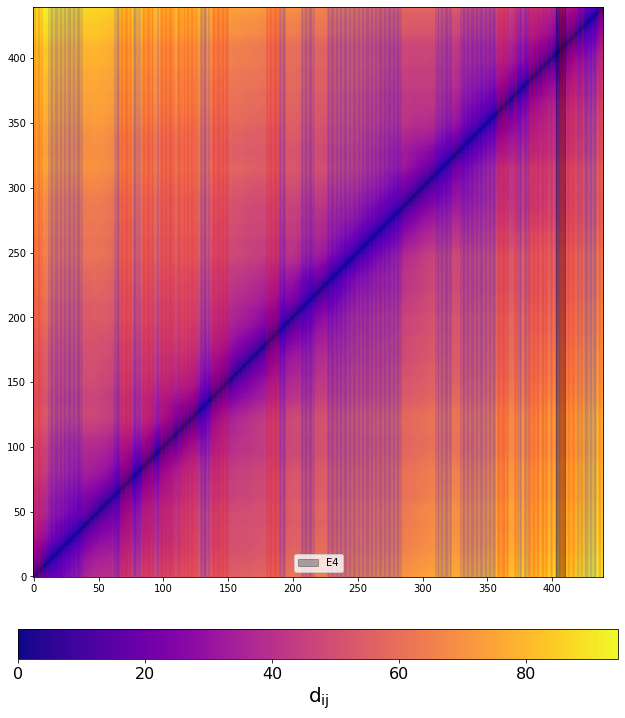

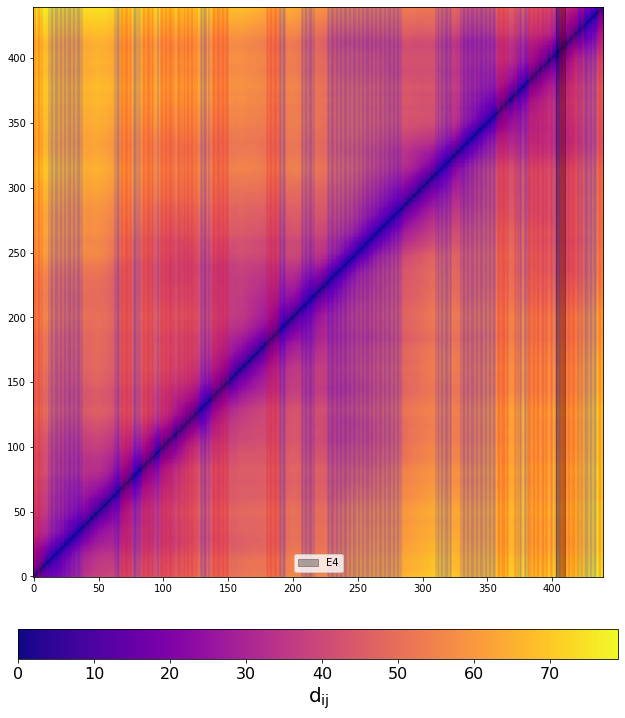

In [77]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='distance_map', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', sequence=cpeb4)
plotty.plot(observable='distance_map', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', sequence=cpeb4)

plotty.plot(observable='distance_map', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', sequence=cpeb4_12D)
plotty.plot(observable='distance_map', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', sequence=cpeb4_12D)

plotty.plot(observable='distance_map', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', sequence=cpeb4_7D)
plotty.plot(observable='distance_map', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', sequence=cpeb4_7D)

plotty.plot(observable='distance_map', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400', sequence=cpeb4_d4)
plotty.plot(observable='distance_map', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', sequence=cpeb4_d4)

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='contact_map', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', sequence=cpeb4)
plotty.plot(observable='contact_map', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', sequence=cpeb4)

plotty.plot(observable='contact_map', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', sequence=cpeb4_12D)
plotty.plot(observable='contact_map', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', sequence=cpeb4_12D)

plotty.plot(observable='contact_map', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', sequence=cpeb4_7D)
plotty.plot(observable='contact_map', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', sequence=cpeb4_7D)

plotty.plot(observable='contact_map', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400', sequence=cpeb4_d4)
plotty.plot(observable='contact_map', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10' , sequence=cpeb4_d4)

### λ = 0

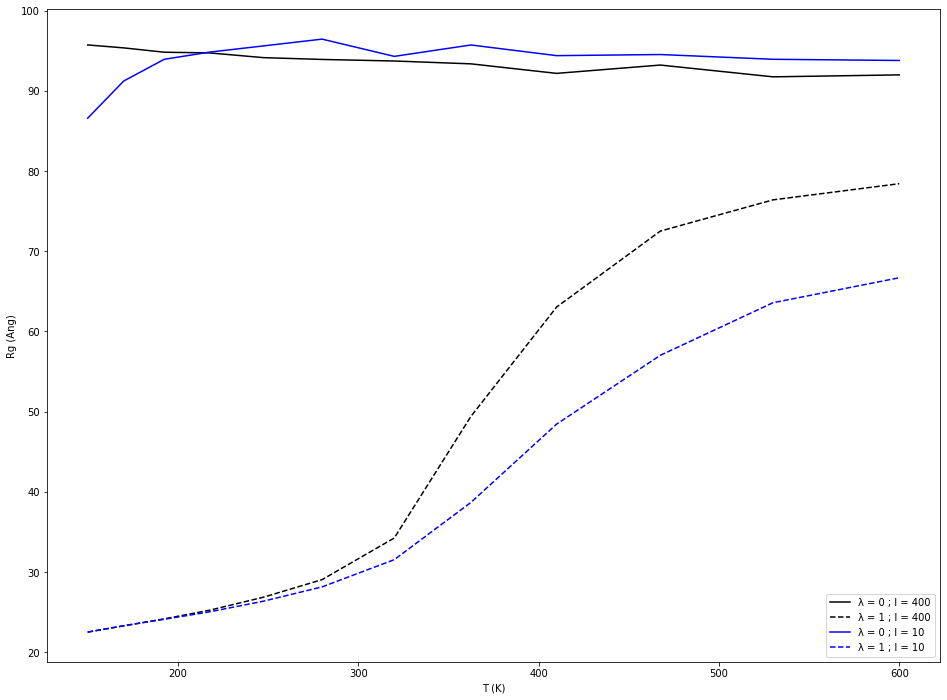

In [52]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.0, label='λ = 0 ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.0, label='λ = 1 ; I = 400', style='--k')

plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.0, label='λ = 0 ; I = 10', style='-b')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=1.0, label='λ = 1 ; I = 10', style='--b')

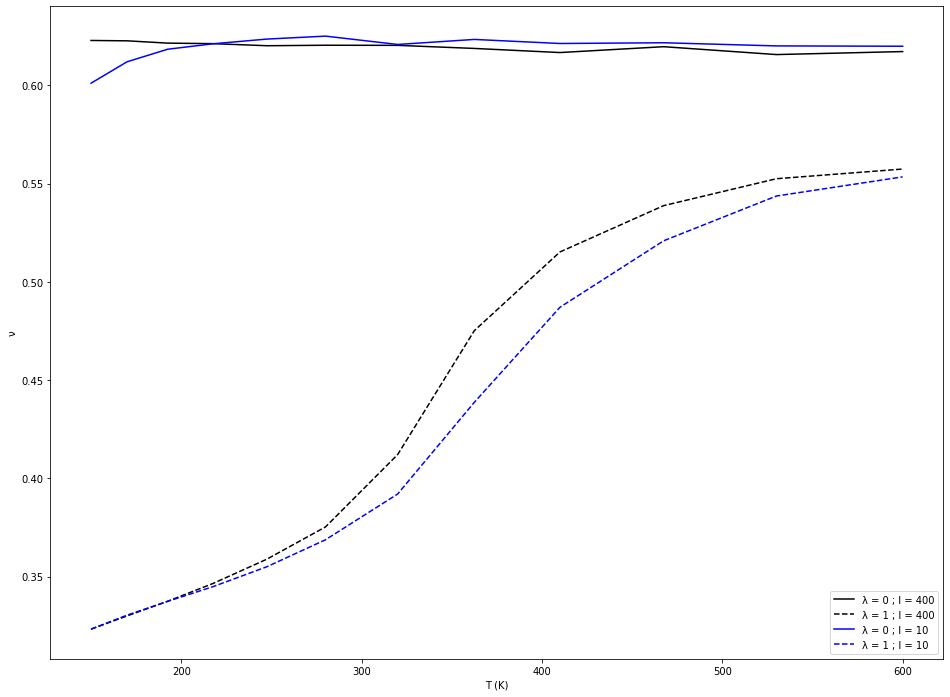

In [53]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=0.0, label='λ = 0 ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.0, label='λ = 1 ; I = 400', style='--k')

plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=0.0, label='λ = 0 ; I = 10', style='-b')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=1.0, label='λ = 1 ; I = 10', style='--b')

### SCRAMBLE

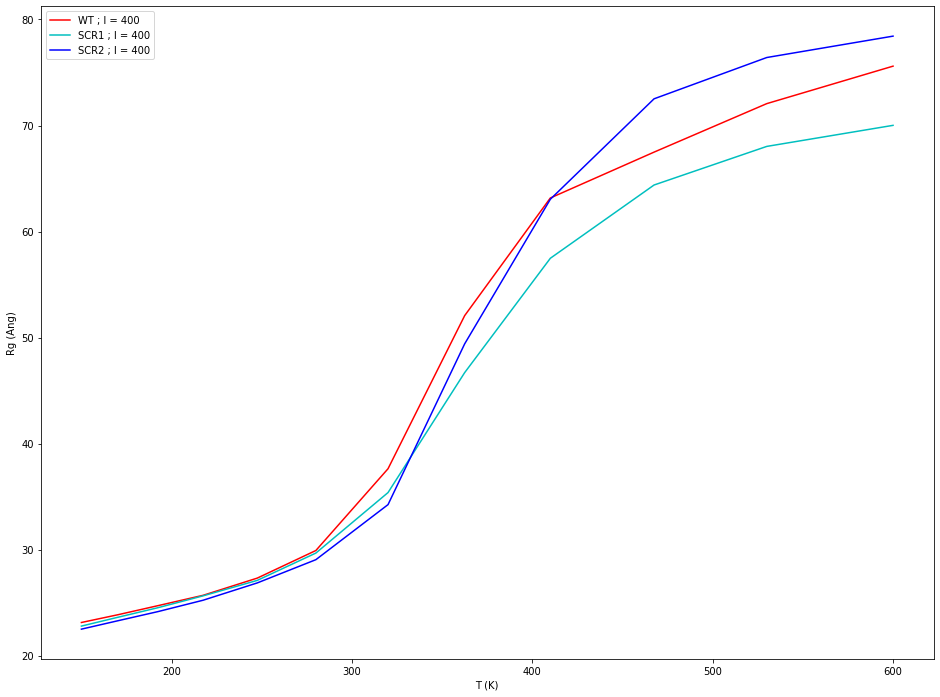

In [87]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4_SCR1', I=400, eps=80, ls=1.0,label='WT ; I = 400', style='-r')
plotty.plot(observable='rg', protein='CPEB4_SCR2', I=400, eps=80, ls=1.0,label='SCR1 ; I = 400', style='-c')
plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.0, label='SCR2 ; I = 400', style='-b')

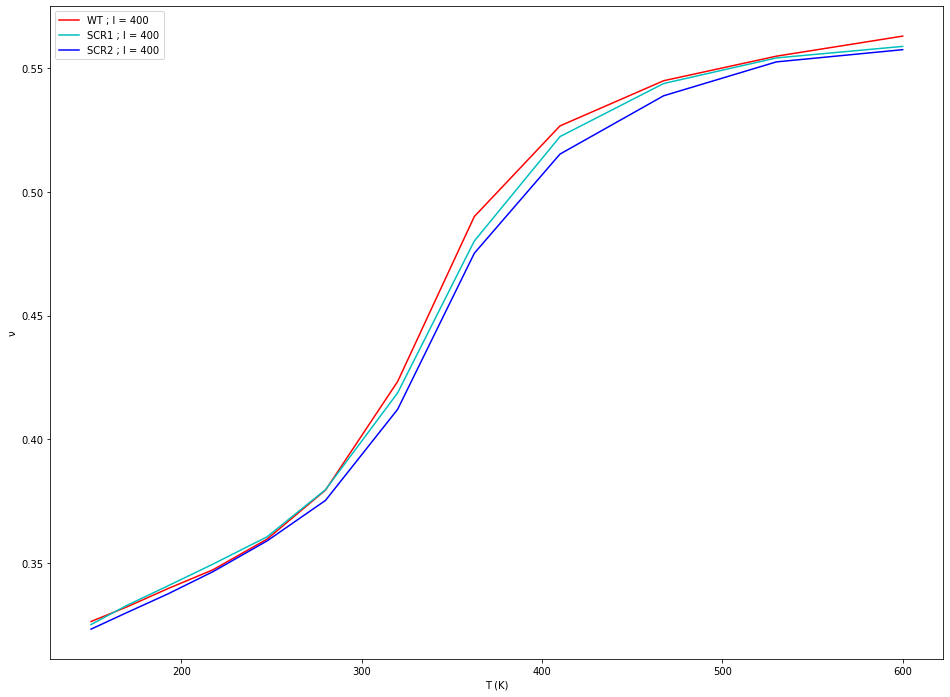

In [88]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4_SCR1', I=400, eps=80, ls=1.0,label='WT ; I = 400', style='-r')
plotty.plot(observable='flory', protein='CPEB4_SCR2', I=400, eps=80, ls=1.0,label='SCR1 ; I = 400', style='-c')
plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.0, label='SCR2 ; I = 400', style='-b')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


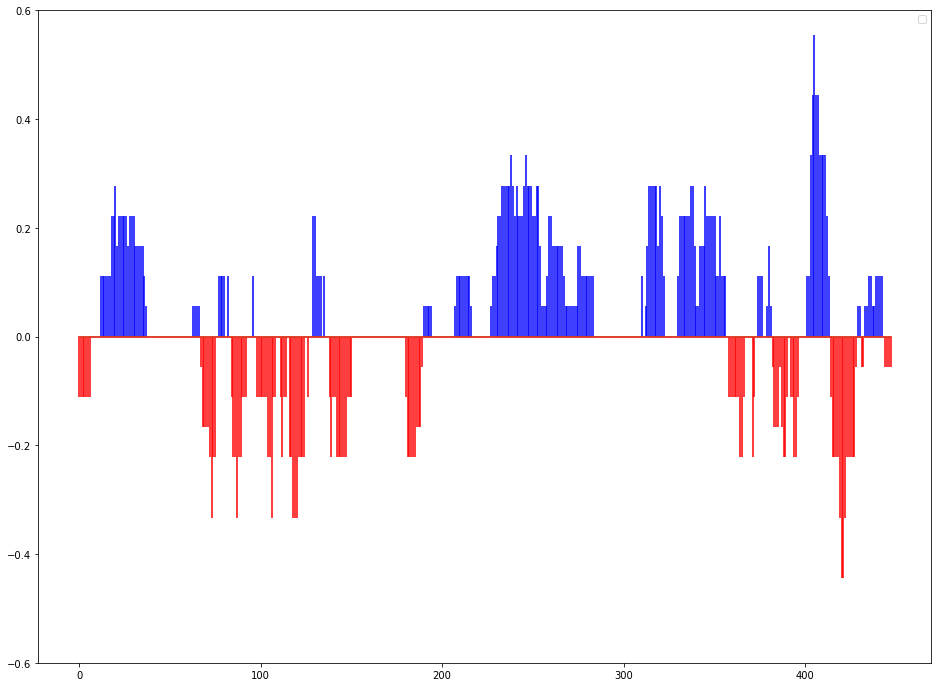

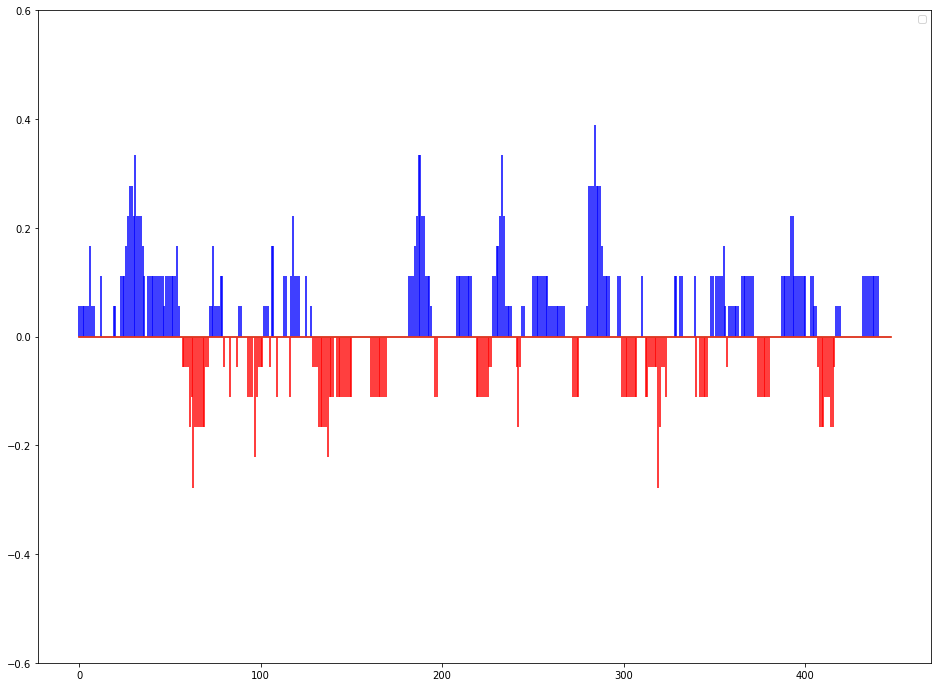

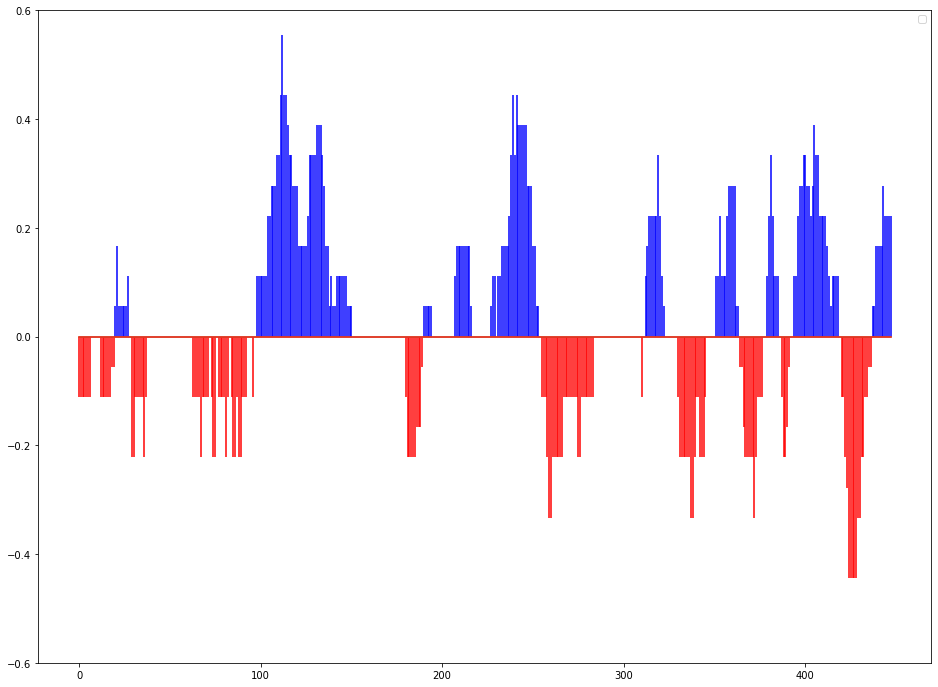

In [61]:
# MAX KAPPA FIXED
scr2 = 'MGDYGFGVLVQSNTGNESAFPVHFKPDLQPPREEQNATPSPAAFINNNTAANGSSAGSAWLFPAPATENIQEKILGSEDAKSQQQEQQDPLKEQQLSPSPGQRAGILPRTHKAHSKRNQGHNSSKNGNGHHKIRIHSPVLTGFHYQHATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPRHVSPGFGGSFSPQIGPLSQHHPDRPHFQHKKSQRQQQHRSPASPEPPPFTEENAAFNQLPDLANNLNDPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGDKKHHGLNGGITPLNSISPLDENFASNDIQLQEYAKPSSAFAPRSWMRHSLNDAENIFPFPDEPKTFRMRSLDSSLIEIMHAHNRTIHARTYGHHRGQSSLFPMHHGFLDDGEGDQPLESGLGSPHCFSRQNGR'
# MIN KAPPA FIXED
scr1 = 'MDRYHFGVLVQSNTGNKEAFPVNHGHERQPHHKGQNATPSPAKFINNNTAAHHSSAGSHDLFPAPDHENIQNSILHSPRDSSHQDHQQQPLGKEQLSESPKEGHGILPPTRGEDKAGKQGEKSSLNGNGQAQHDIQEPVLTGFSYQDATGLGTSTQPLTSSASSLDGFSNWSAAIAPSSSTIINNPKSFHHKGEVPAASANNGALLFQNFPARVSPGFGGSFSDQIGPLSHAHPHPHRDDQHWSQTQQQIQSPAKPPPPPFTFHNAAFNQLPNLANELNSRPSPHKSYRSPSETRSSSWSPGGEGYGGWGGSQGREDQHGLNGEITPLRSISPLERNFASNFIQEKDYALPRREFAPASHMAISLNSAFRIFPFPNDPSTFQMTSLNSSLIRIMPARNETKSAGTYGAAHGDDSLHPMSGGFLWWGGGQQPLFSGLRSPPCFSPQNGQ'


importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4', I=400, eps=80, ls=1.0, sequence=cpeb4)
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4_SCR1', I=400, eps=80, ls=1.0, sequence=scr1)
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4_SCR2', I=400, eps=80, ls=1.0, sequence=scr2)

### I vs ε

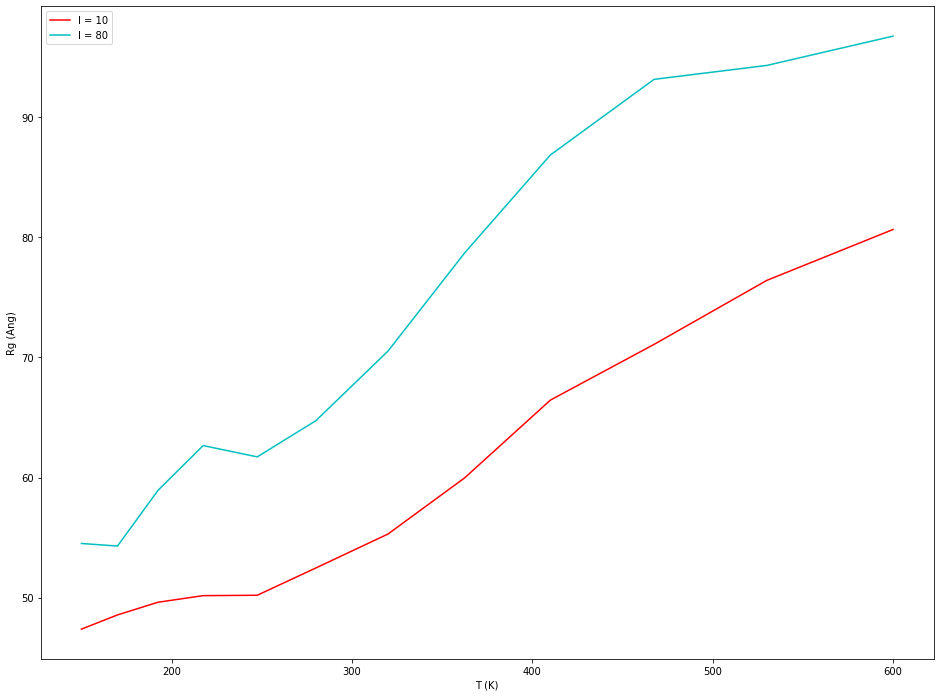

In [62]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4_IEps', I=10, eps=10, ls=1.0,label='I = 10', style='-r')
plotty.plot(observable='rg', protein='CPEB4_IEps', I=80, eps=80, ls=1.0,label='I = 80', style='-c')

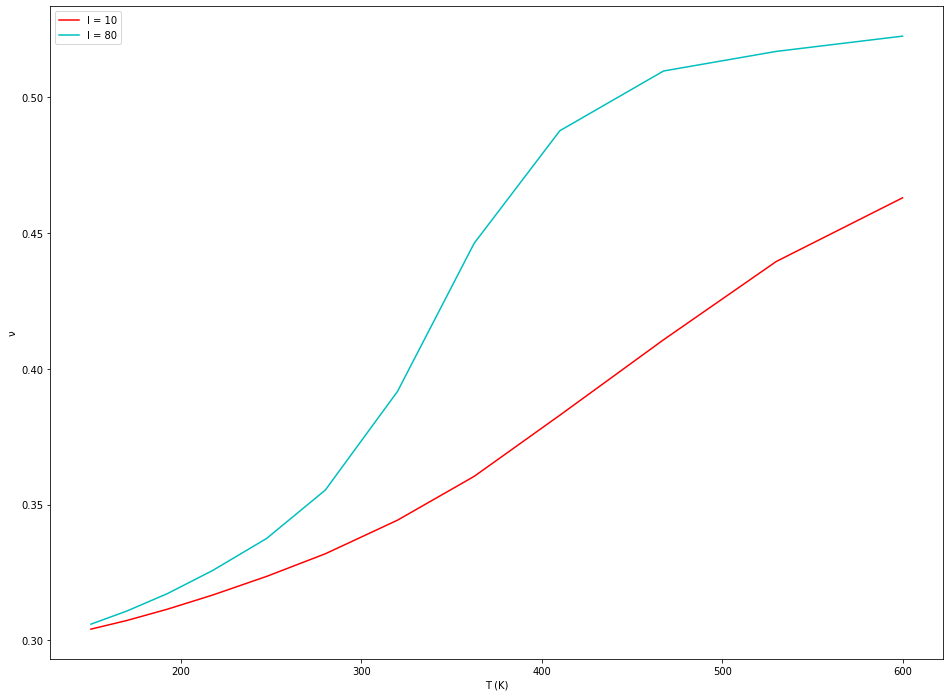

In [63]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4_IEps', I=10, eps=10, ls=1.0,label='I = 10', style='-r')
plotty.plot(observable='flory', protein='CPEB4_IEps', I=80, eps=80, ls=1.0,label='I = 80', style='-c')

### MULTI CPEB4 (JUST REORDER)

In [40]:
# order = lmp.LMP(oliba_wd='/home/adria/data/prod/lammps/CPEB4x2', temper=True)
# order._temper_trj_reorder()
order = lmp.LMP(oliba_wd='/home/adria/data/prod/lammps/CPEB4x50', temper=True)
order._temper_trj_reorder()

['/home/adria/data/prod/lammps/CPEB4x50/reorder-0.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-1.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-2.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-3.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-4.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-5.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-6.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-7.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-8.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-9.lammpstrj']

In [54]:
print(len(cpeb4))

448


In [ ]:
print()